# Project Overview

# Problem Statement

# Metadata

In [1]:
# Bank Client Data:

In [2]:
# Data Related with the last contact of the current campaign:

In [3]:
# Other attributes

In [4]:
# Target

# Metrics

The following metrics (common to any classification problem) were analysed: accuracy, precision, recall, AUC and f1.
The main metric to be analysed is accuracy, given that the goal of this project is to predict wheter a client will subscribe to the bank services or not.

# Importing libraries

In [170]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
import numpy as np
%matplotlib inline

# Data Exploration

In [6]:
# Importing the data

import pandas as pd
data = pd.read_csv('bank-full.csv')

In [7]:
data.shape

(45211, 17)

In [8]:
# Looking at a the head
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [9]:
# Looking at a sample
data.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
39295,32,technician,married,secondary,no,580,yes,no,cellular,18,may,8,4,279,2,other,no
33636,35,entrepreneur,married,tertiary,no,129,yes,no,cellular,20,apr,231,3,151,5,other,no
116,41,admin.,married,secondary,no,351,yes,no,NaN,5,may,518,1,-1,0,NaN,no
22111,44,management,divorced,tertiary,no,243,no,no,cellular,21,aug,118,4,-1,0,NaN,no
2215,48,blue-collar,married,secondary,no,684,yes,yes,NaN,12,may,139,1,-1,0,NaN,no
15713,39,management,married,tertiary,no,1423,yes,no,telephone,21,jul,733,3,-1,0,NaN,yes
45094,47,admin.,single,secondary,no,1693,yes,no,cellular,22,oct,608,2,92,4,other,yes
27650,47,housemaid,married,tertiary,no,333,no,no,telephone,21,nov,8,5,137,1,failure,no
31316,65,housemaid,married,primary,no,715,no,no,cellular,11,mar,323,1,-1,0,NaN,yes
29702,31,management,married,tertiary,no,777,yes,no,cellular,3,feb,245,4,-1,0,NaN,no


In [10]:
# Checking the data types per column
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [11]:
# Looking at the non-null count and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
# Describing the data
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Data Visualization

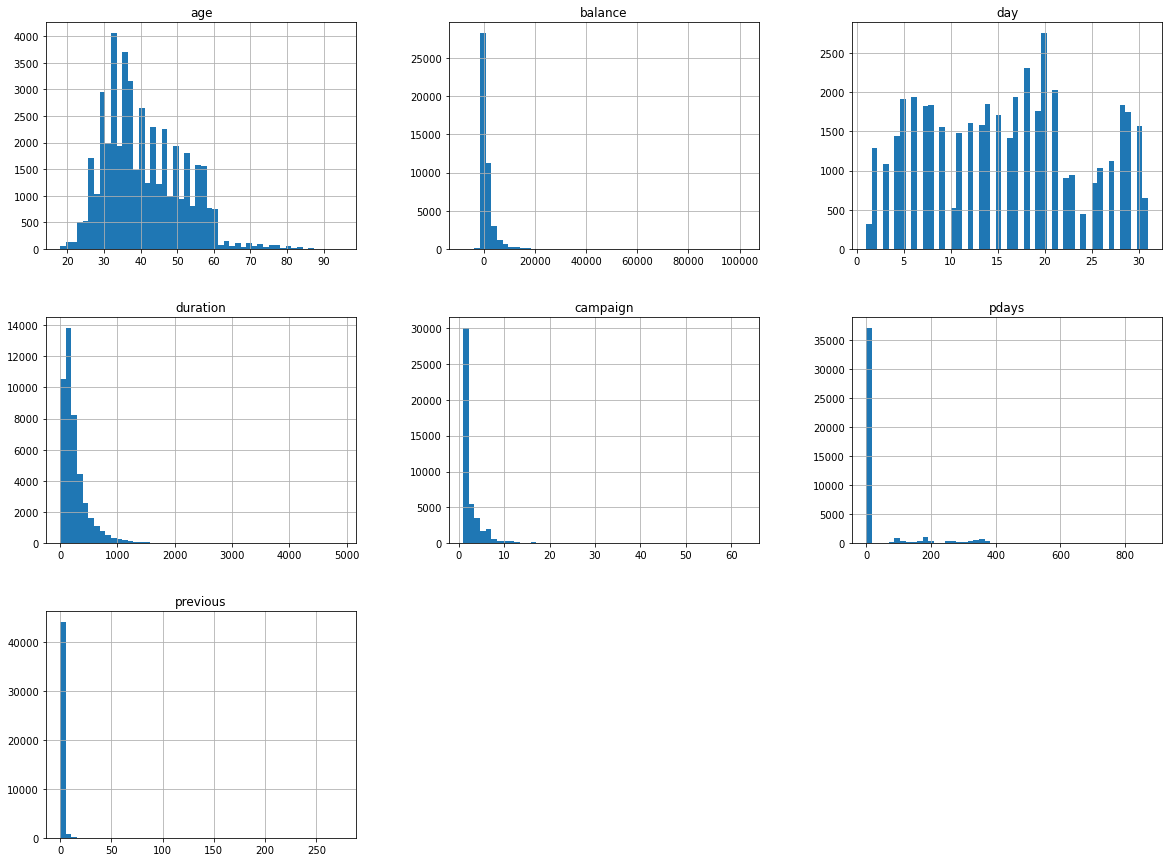

In [13]:
# Looking at the distribution of some variables

data.hist(bins=50, figsize=(20,15))
plt.show()

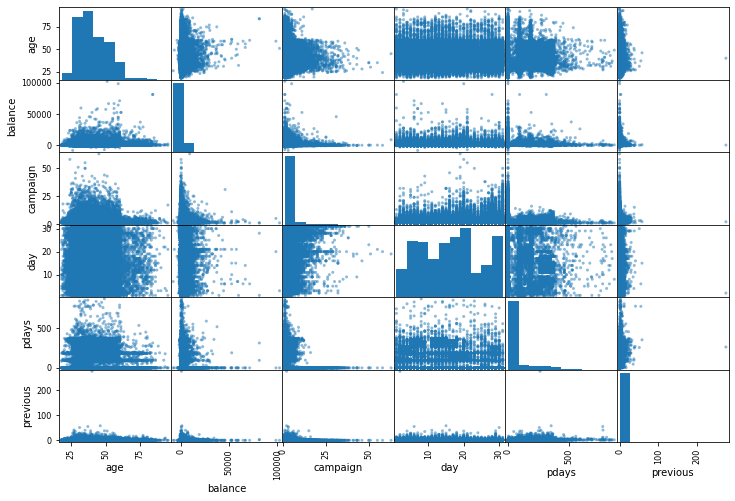

In [14]:
# Looking at the drelationship between some variables
# Looking at the distribution of some variables# from pandas.tools.plotting import scatter_matrix 

attributes = ["age", "balance", "campaign",
              "day","pdays","previous"]
matrix = scatter_matrix(data[attributes], figsize=(12, 8))

In [15]:
# Taking a look at the distribution of some categorical variables

In [16]:
def plot_count(label, dataset):

    """ 
    
    Function to plot distribution of categorical variables.
    
    Attributes:
        label (string): label of the dataset we want to visualize
        dataset: dataset to be explored
            
    """
    
    
    plt.figure(figsize=(15,10))
    Y = data[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset)
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    #adjust the ticklabel to the desired format, without changing the position of the ticks.
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    # ax.legend(labels=["no","yes"])
    plt.show()

In [17]:
def plot_count_withY(label, dataset):
    
    """ 
    
    Function to plot distribution of categorical variables considering the target (y) variable.
    
    Attributes:
        label (string): label of the dataset we want to visualize
        dataset: dataset to be explored
            
    """
        
    plt.figure(figsize=(20,10))
    Y = data[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset, hue="y")
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    #adjust the ticklabel to the desired format, without changing the position of the ticks.
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    # ax.legend(labels=["no","yes"])
    plt.show()

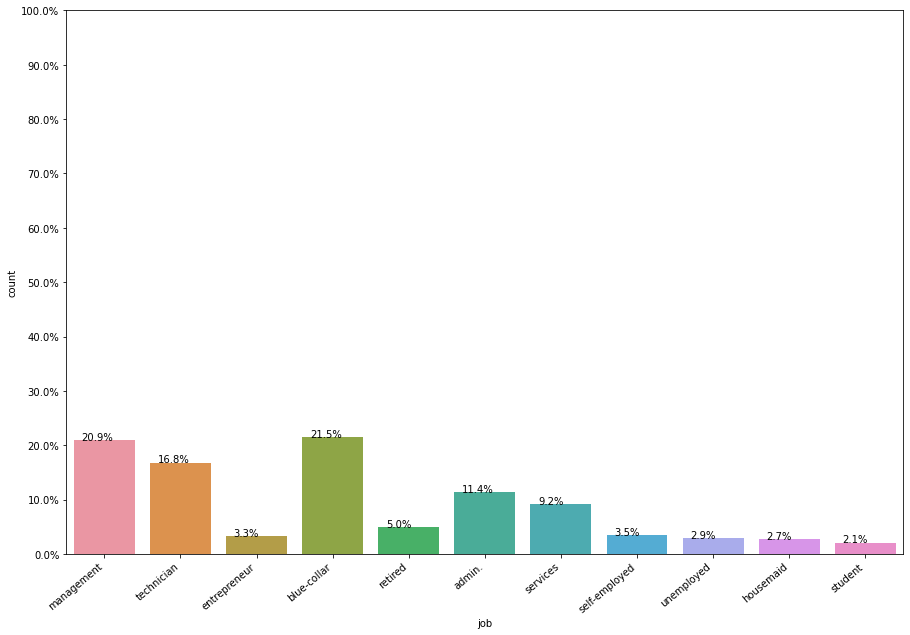

In [18]:
# Visualizing the job categorical variable

# We can see that most of the customers have jobs as "admin", "blue-collar" or "technician"

plot_count("job", data)

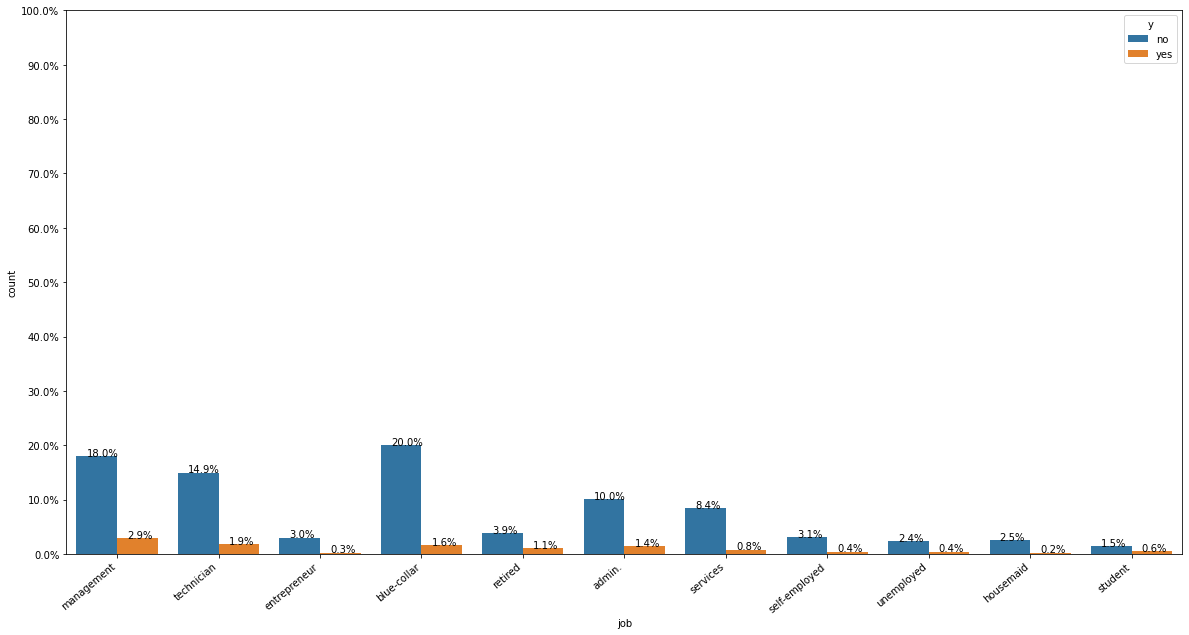

In [19]:
# Visualizing the job categorical variable with Y

# We can see that the customers who have a job of admin have the highest rate of subscribing a term deposit, but they are also the highest when it comes to not subscribing
plot_count_withY("job", data)

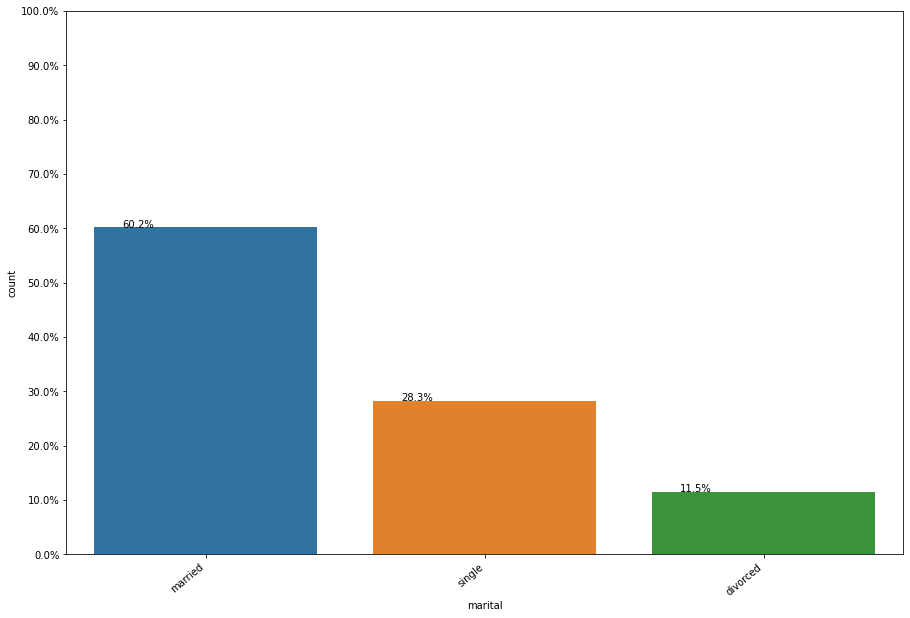

In [20]:
# Visualizing the Marital categorical variable 

plot_count("marital", data)

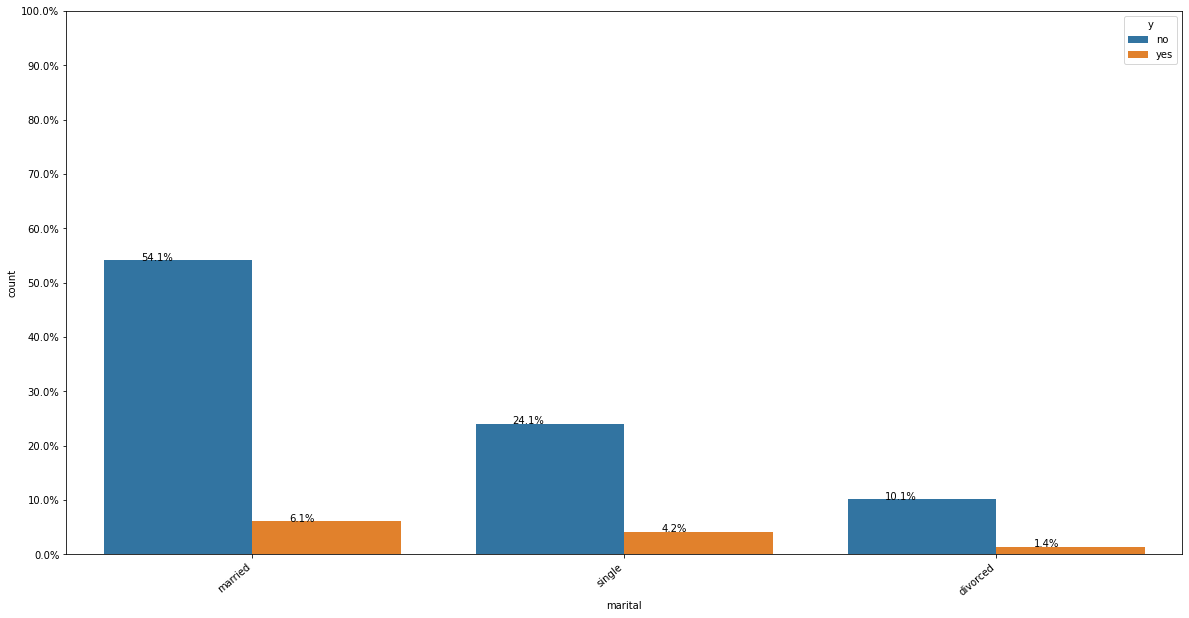

In [21]:
# Visualizing the Marital categorical variable with Y

plot_count_withY("marital", data)

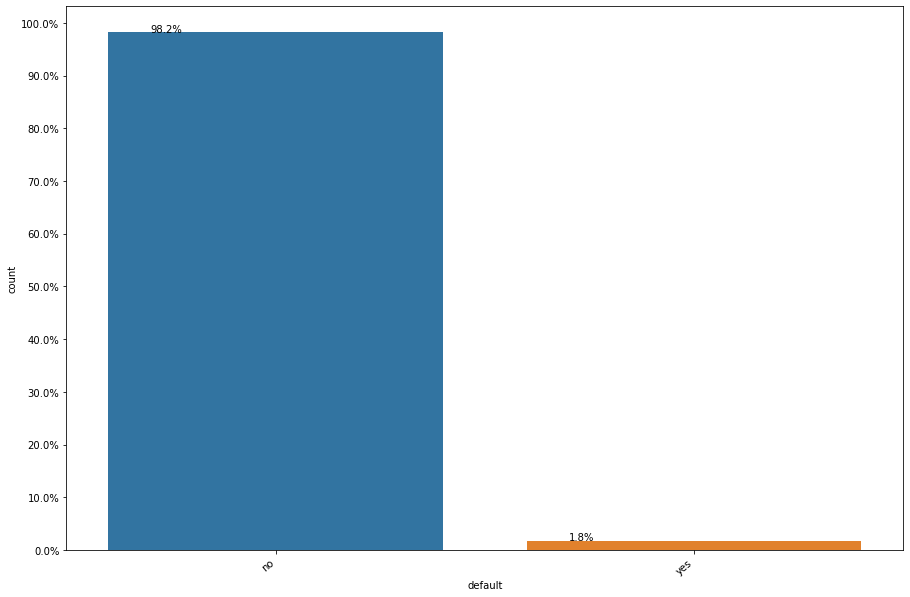

In [22]:
# Visualizing the default categorical variable 

plot_count("default", data)

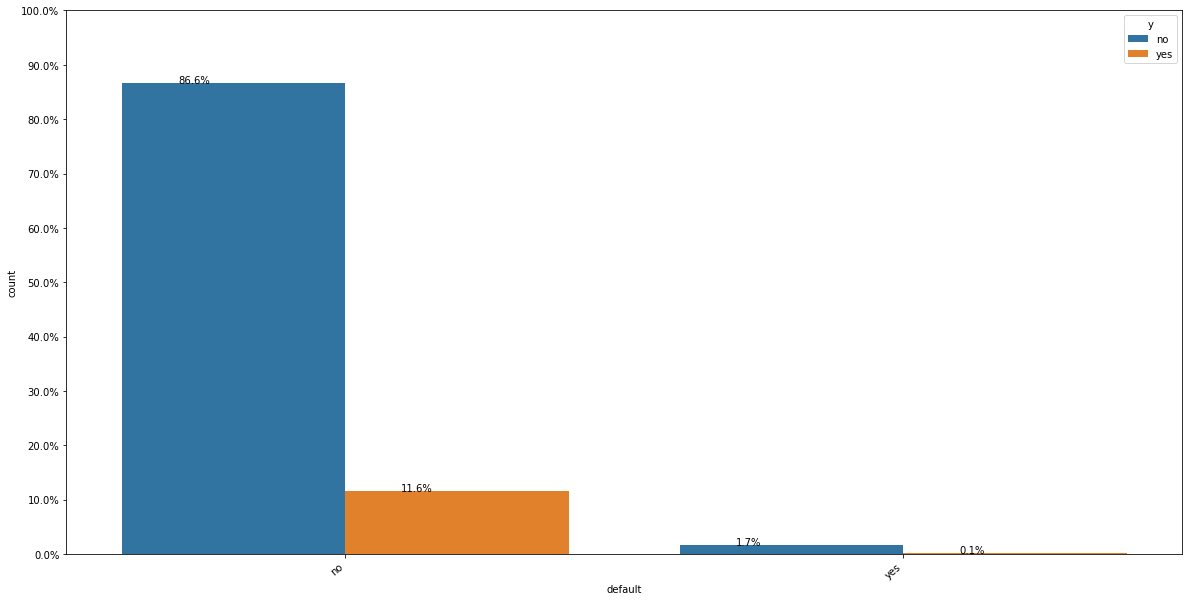

In [23]:
# Visualizing the default categorical variable with Y

plot_count_withY("default", data)

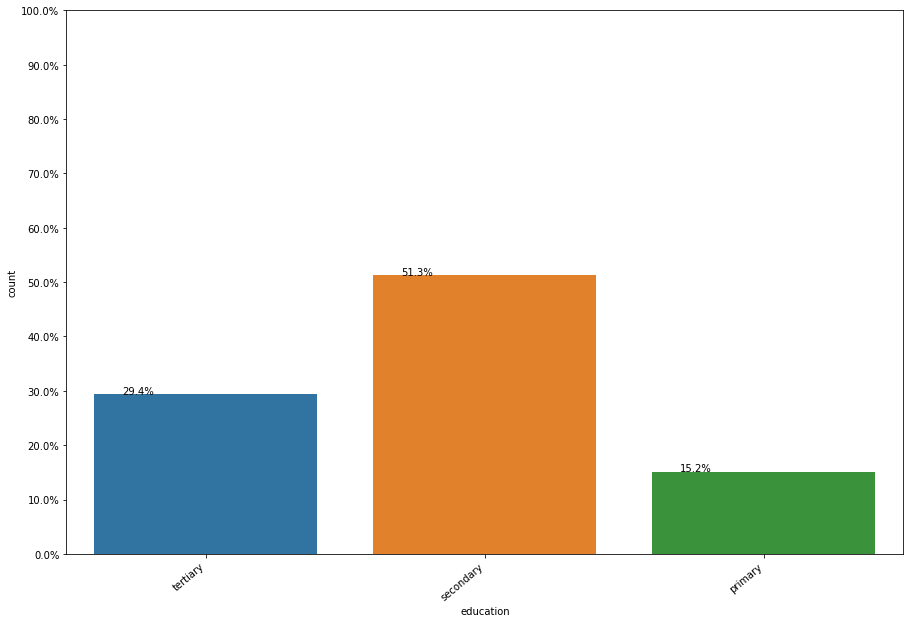

In [24]:
# Visualizing the education categorical variable 

plot_count("education", data)

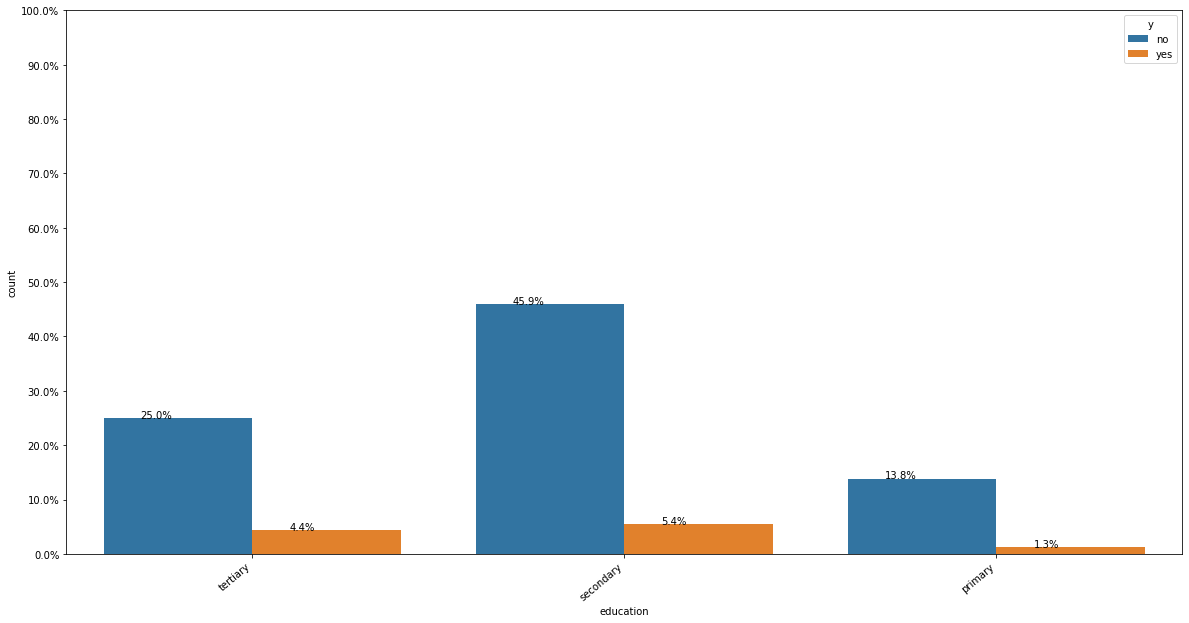

In [25]:
# Visualizing the education categorical variable with Y

plot_count_withY("education", data)

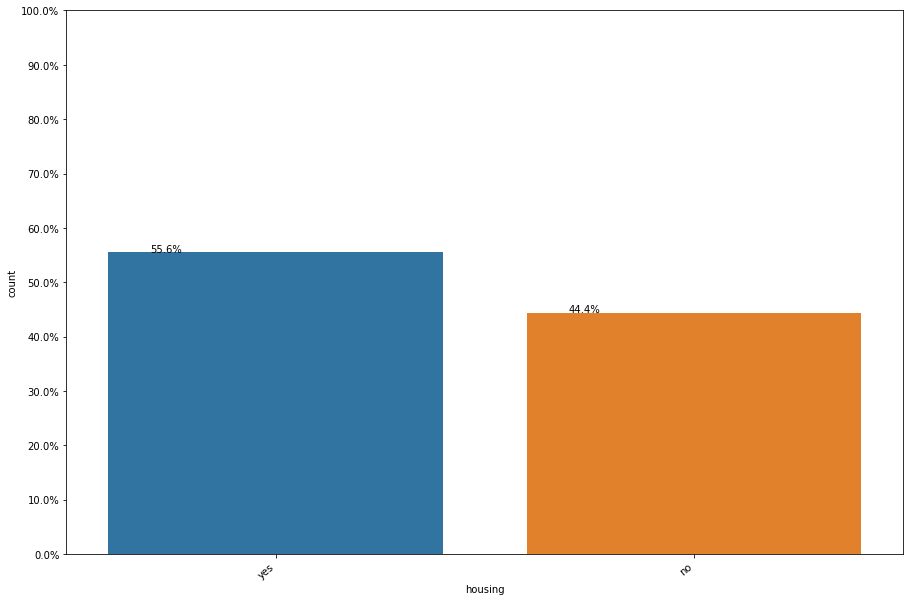

In [26]:
# Visualizing the housing categorical variable 

plot_count("housing", data)

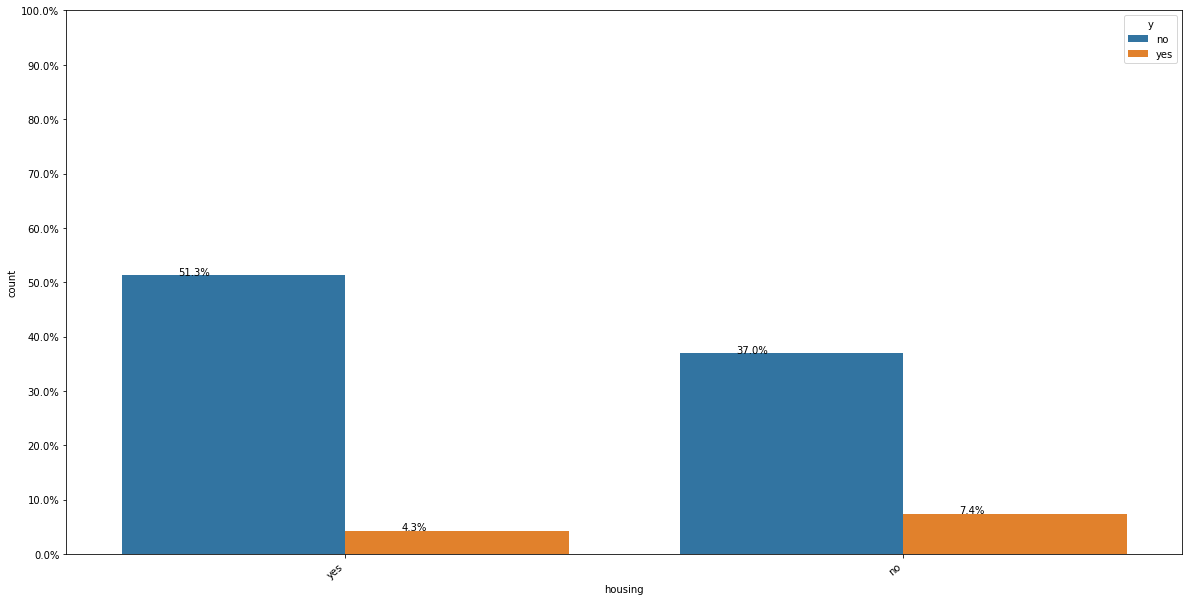

In [27]:
# Visualizing the housing categorical variable with Y

plot_count_withY("housing", data)

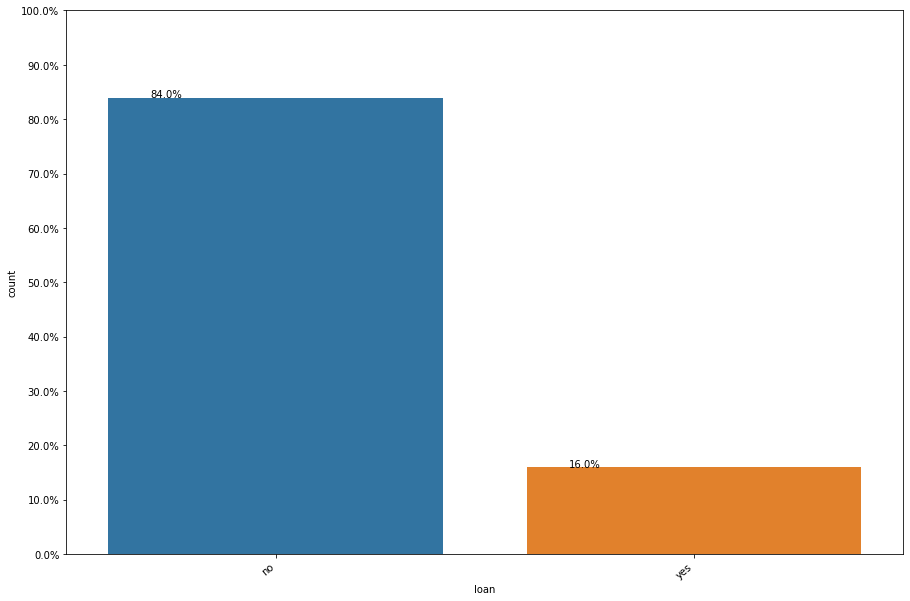

In [28]:
# Visualizing the loan categorical variable 

plot_count("loan", data)

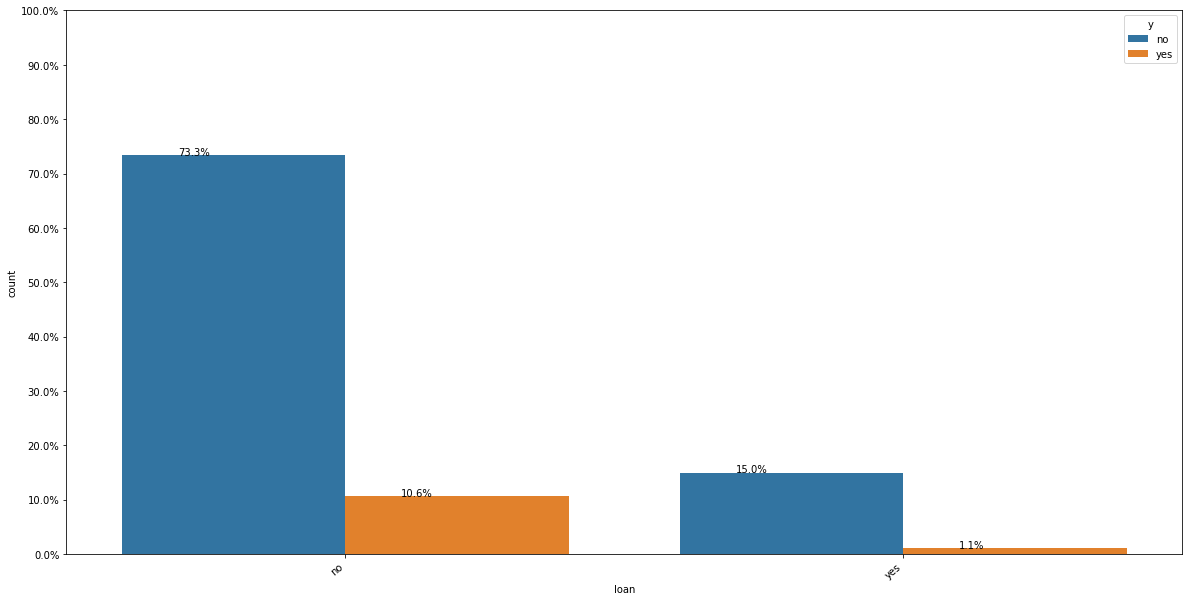

In [29]:
# Visualizing the loan categorical variable with Y

plot_count_withY("loan", data)

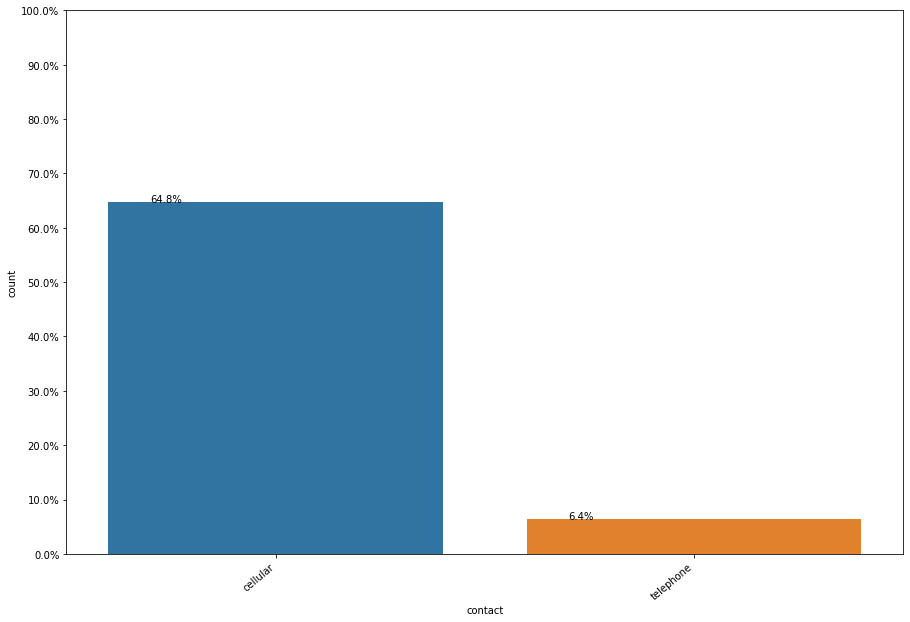

In [30]:
# Visualizing the contact categorical variable 

plot_count("contact", data)

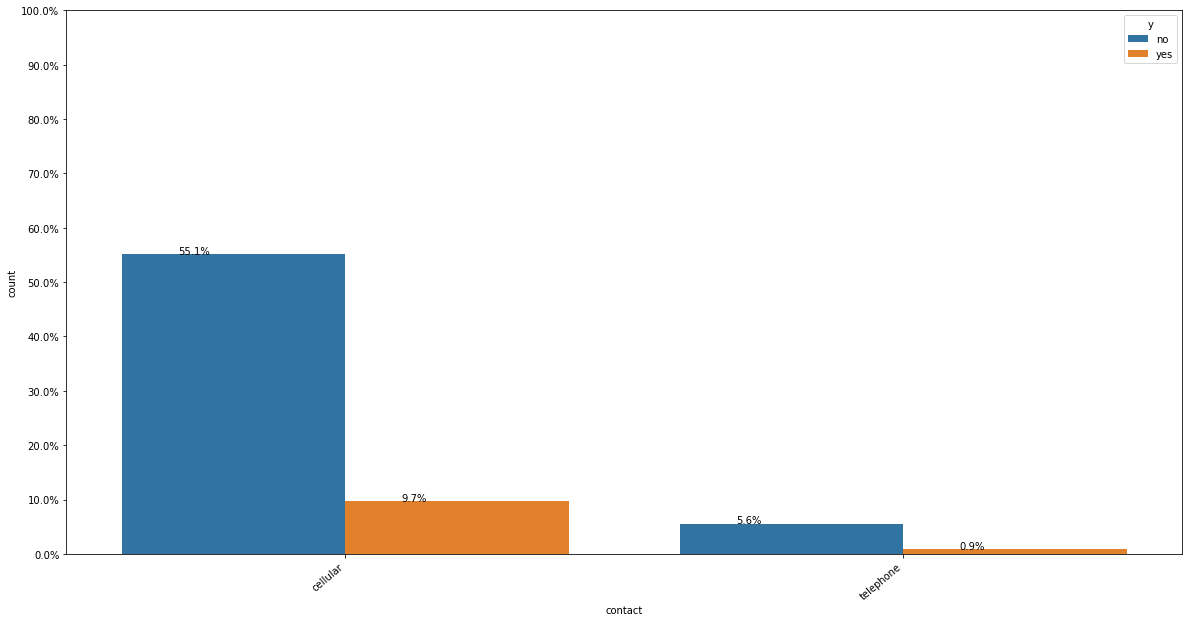

In [31]:
# Visualizing the contact categorical variable with Y

plot_count_withY("contact", data)

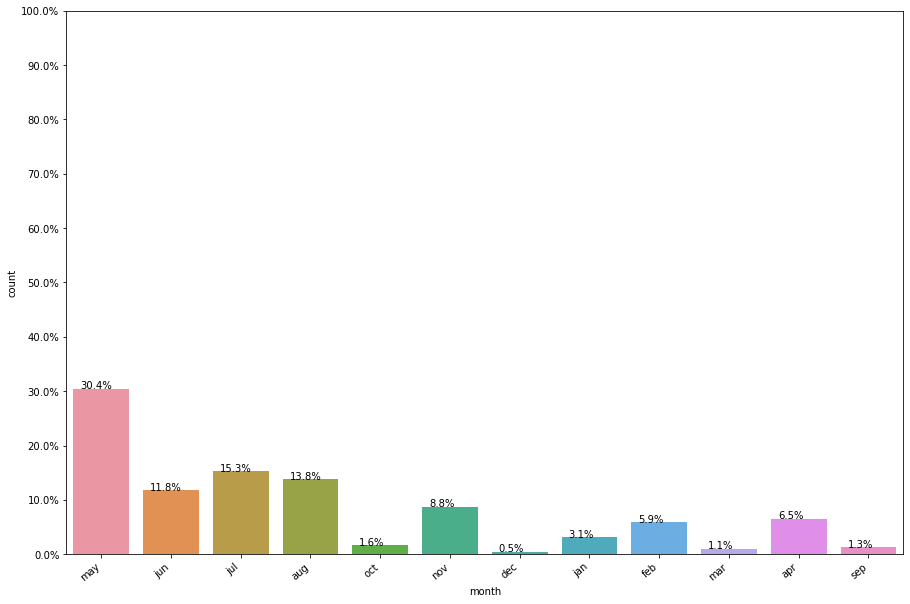

In [32]:
# Visualizing the month categorical variable 

plot_count("month", data)

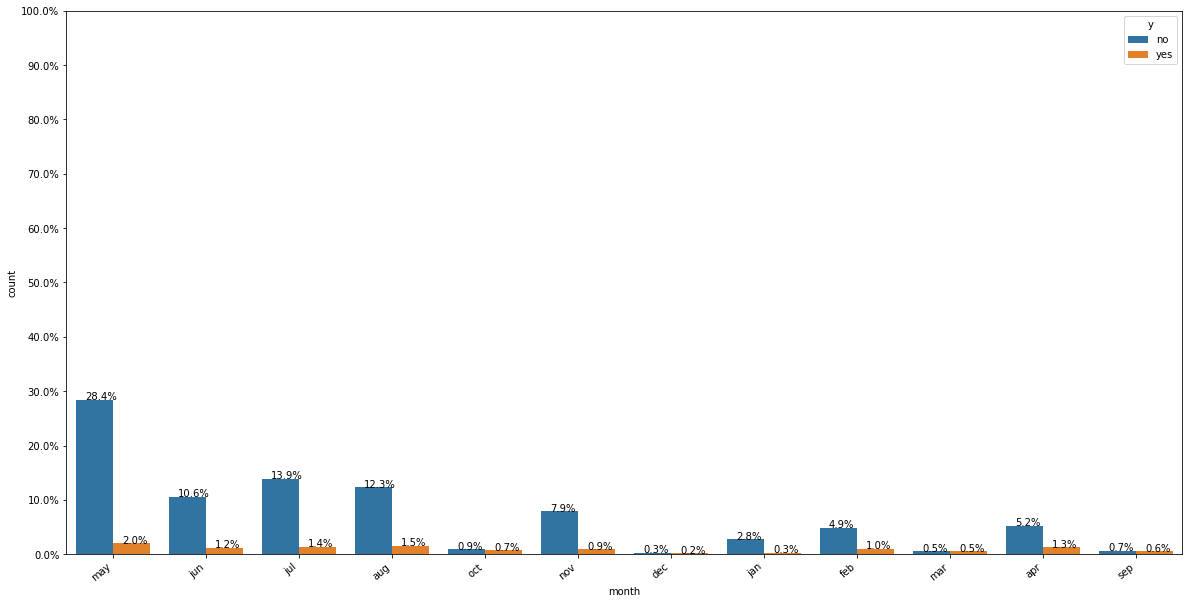

In [33]:
# Visualizing the month categorical variable with Y

plot_count_withY("month", data)

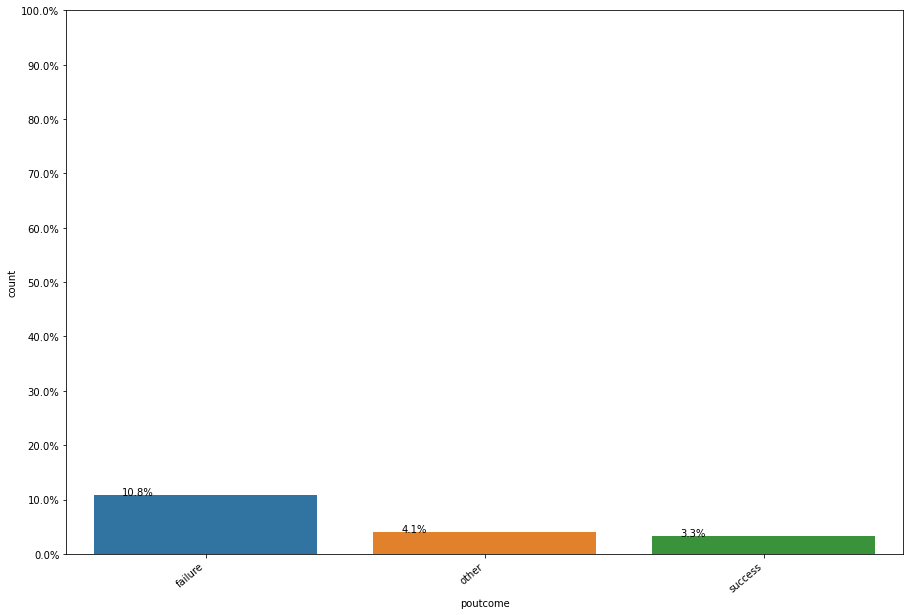

In [34]:
# Visualizing the poutcome categorical variable 

plot_count("poutcome", data)

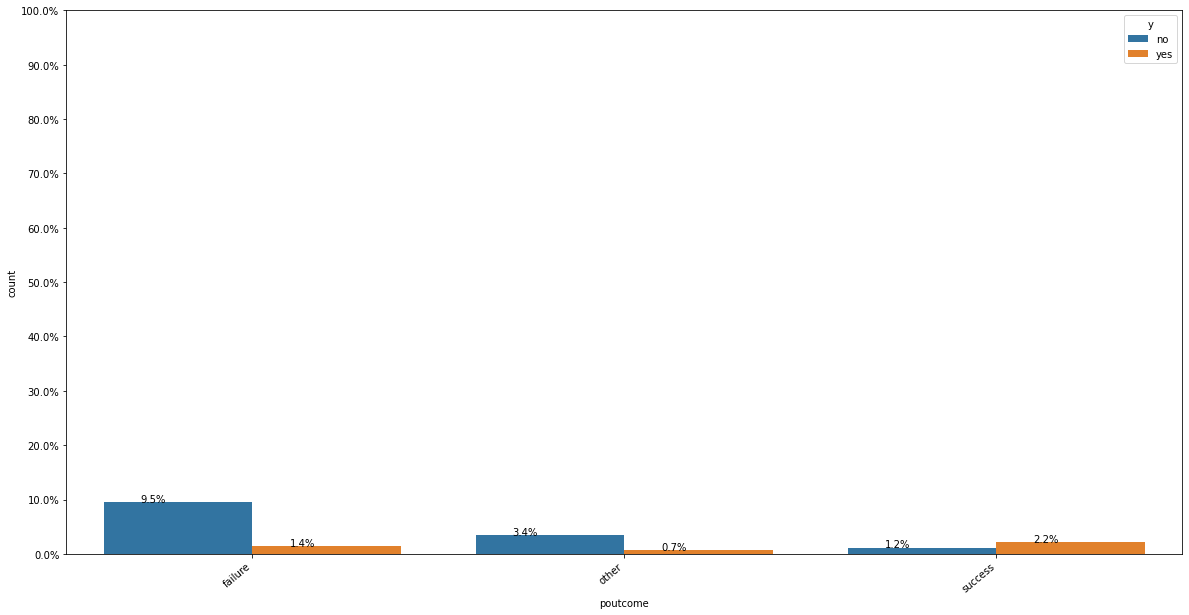

In [35]:
# Visualizing the poutcome categorical variable with Y

plot_count_withY("poutcome", data)

# Data Preprocessing

# Looking for abnormalities and outliers

In [36]:
def box_plot(data, y):
    
    """ 
    
    Function to plot boxplot of a continuous variable.
    
    Attributes:
        y (string): continuous and numerical variable to be analysed
        data: dataset to be explored
            
    """
        
    plt.figure(figsize=(8, 8))
    sns.boxplot(data=data, x="y", y=y)
    plt.xlabel('y', fontsize=18)
    plt.ylabel(y, fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show(True)

In [37]:
def dist_plot(data, y):
    
    """ 
    
    Function to plot the distribution of a continuous variable.
    
    Attributes:
        y (string): continuous and numerical variable to be analysed
        data: dataset to be explored
            
    """
    plt.figure(figsize=(10,8))
    sns.distplot(data[y])
    plt.show()

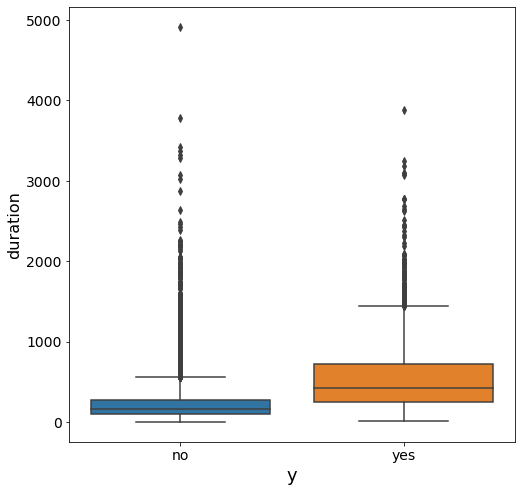

In [38]:
box_plot(data=data, y="duration")

C:\Users\crdea\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


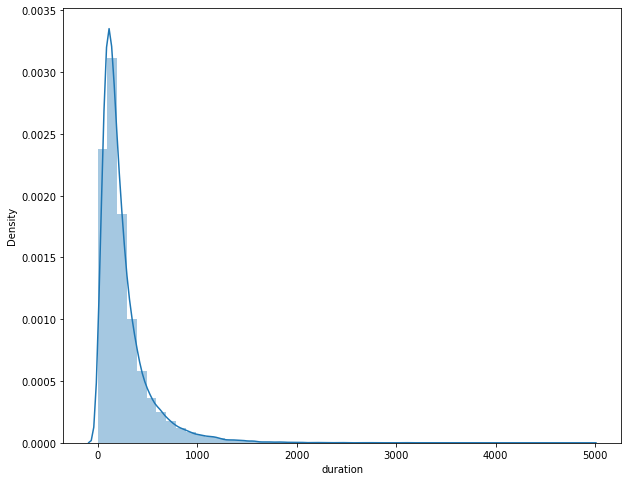

In [39]:
dist_plot(data=data, y="duration")

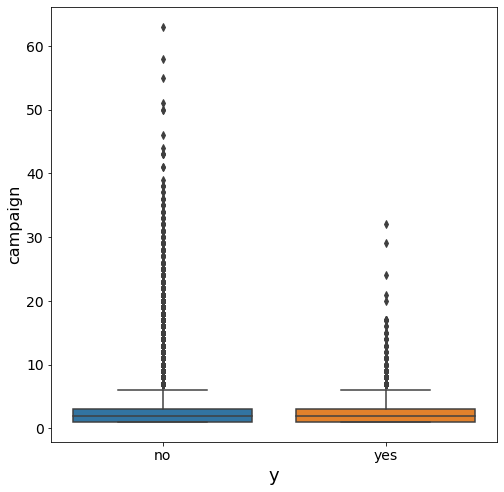

In [40]:
box_plot(data=data, y="campaign")

C:\Users\crdea\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


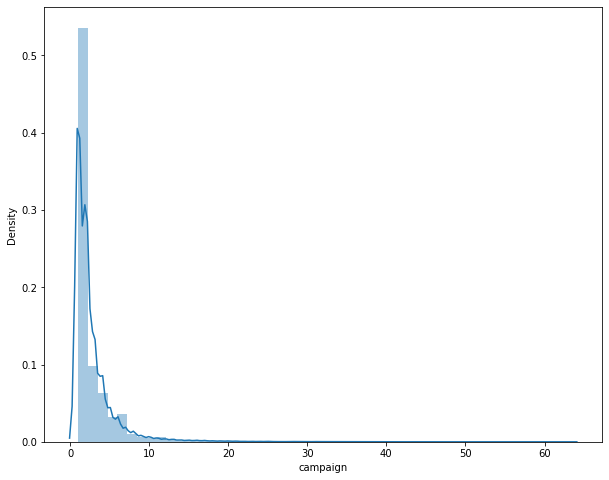

In [41]:
dist_plot(data=data, y="campaign")

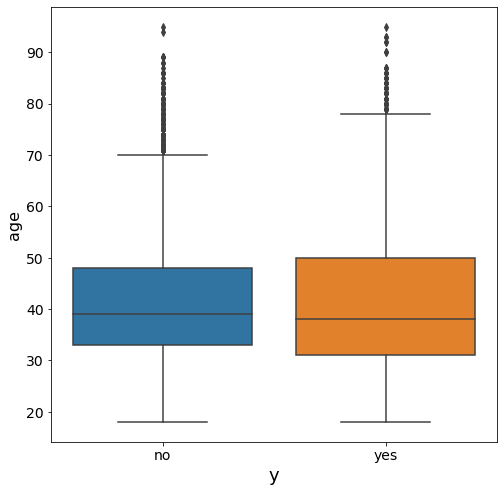

In [42]:
box_plot(data=data, y="age")

C:\Users\crdea\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


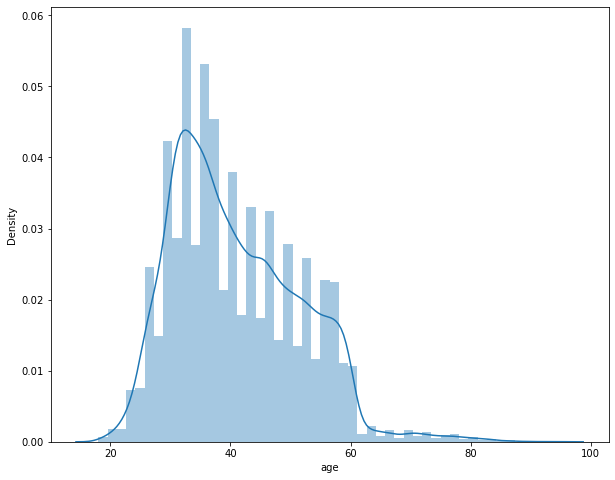

In [43]:
dist_plot(data=data, y="age")

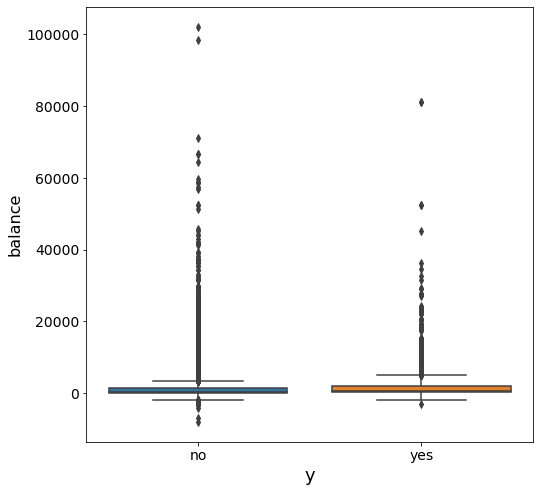

In [44]:
box_plot(data=data, y="balance")

C:\Users\crdea\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


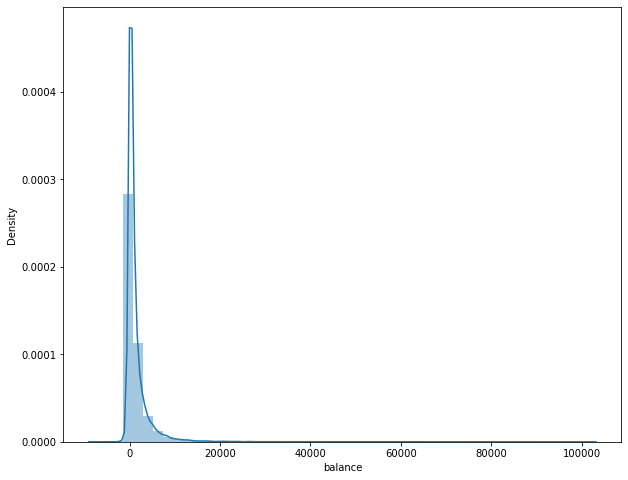

In [45]:
dist_plot(data=data, y="balance")

# Data Correlation

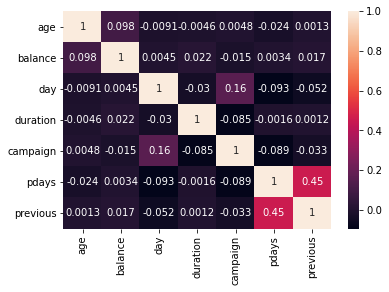

In [46]:
# Pearson correlation

df = pd.DataFrame(data)

corrMatrix = df.corr(method = 'pearson')
sns.heatmap(corrMatrix, annot=True)
plt.show()

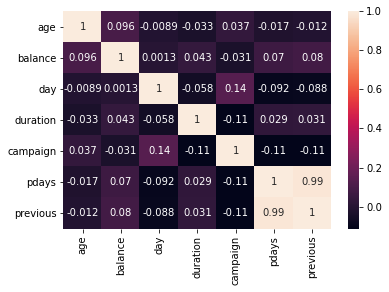

In [47]:
# Spearman correlation

df = pd.DataFrame(data)

corrMatrix = df.corr(method = 'spearman')
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [48]:
# The variables day and month are contained in the pdays variable

data_1 = data.drop(["day", "month"], axis=1)

In [49]:
# The variables pdays and previous are seriously correlated
# As pdays brings more meaning to the problem the variable previous will be discarted

data_2 = data_1.drop(["previous"], axis=1)

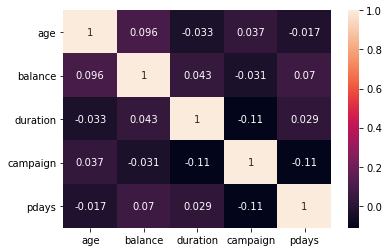

In [50]:
# Looking at how the correlations are currently distributed

df = pd.DataFrame(data_2)

corrMatrix = df.corr(method = 'spearman')
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Missing Values

<AxesSubplot:>

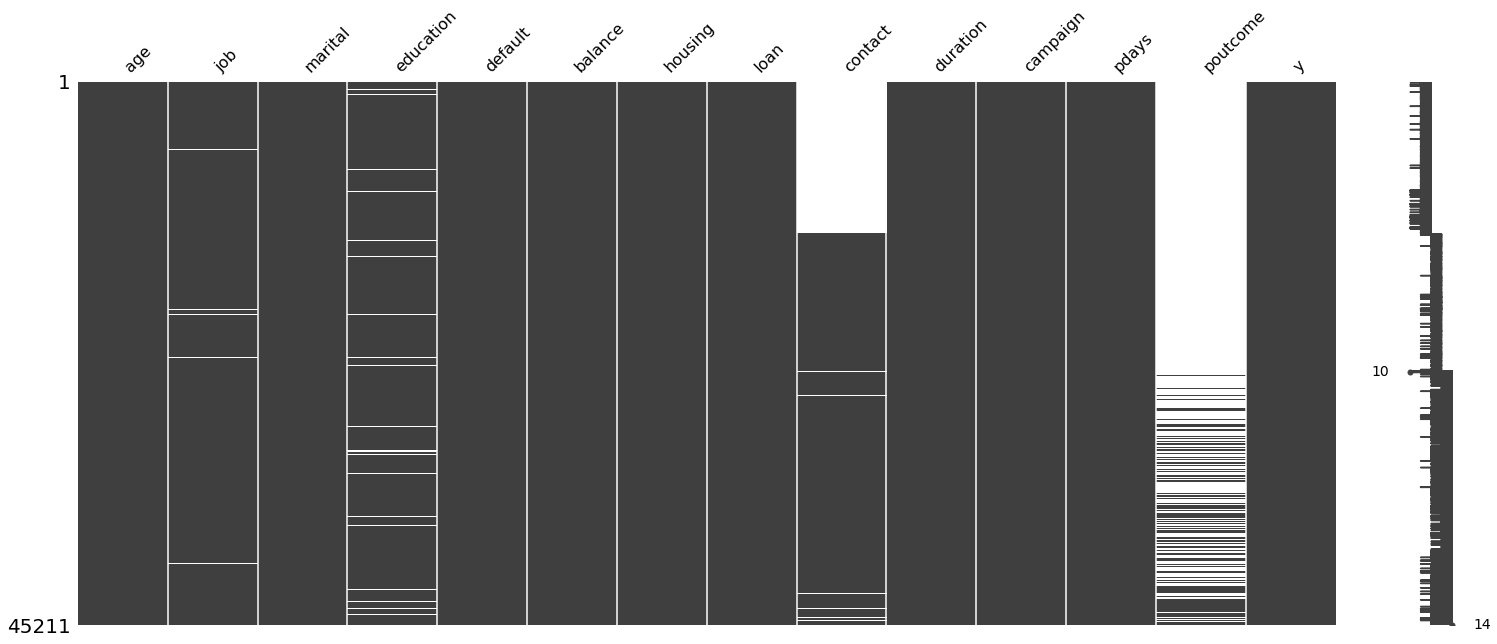

In [51]:
# Looking at the missing values

msno.matrix(data_2)

<AxesSubplot:>

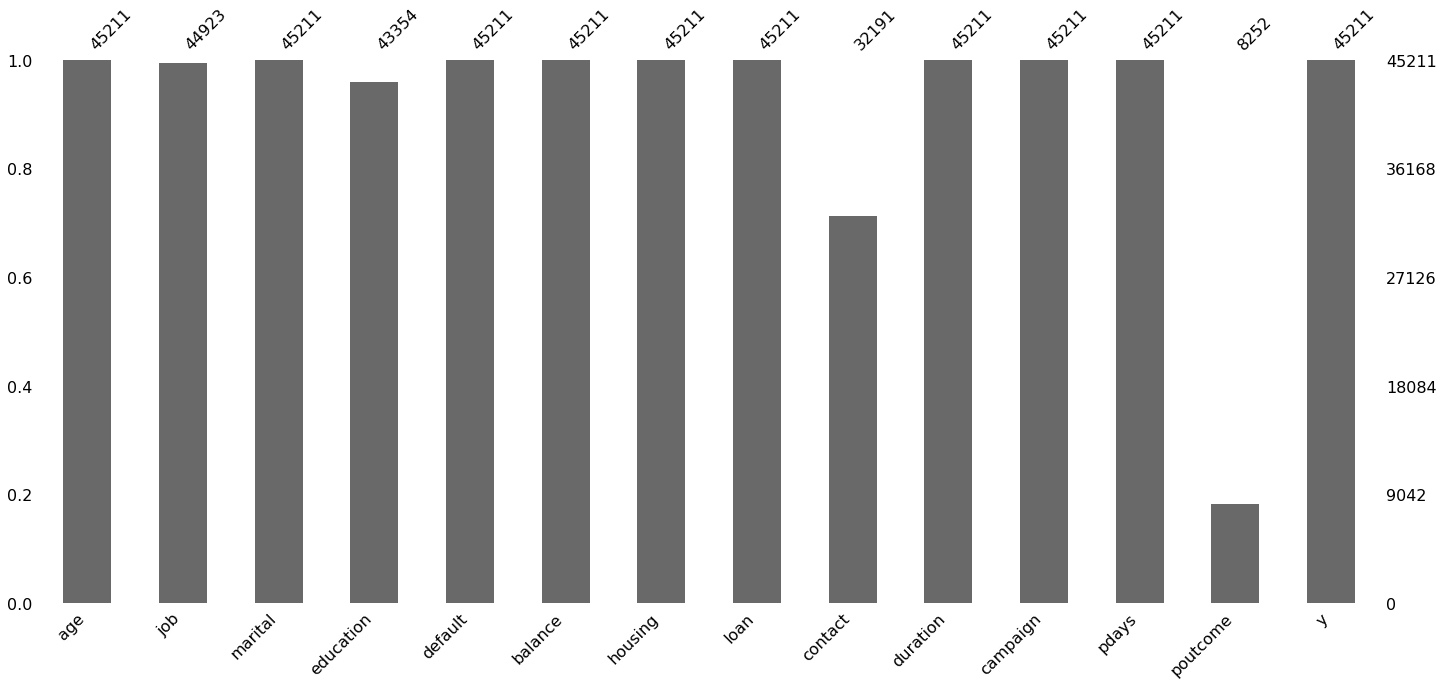

In [52]:
# Looking at the missing values

msno.bar(data_2)

In [53]:
# The variable poutcome has too many missing values and will be discarted

data_3 = data_2.drop(["poutcome"], axis=1)

In [54]:
# Removing the rows with missing data in education

data_3.dropna(subset=['education'], inplace=True)

In [55]:
# Contact - the missing values will be named as 'unkonown'

data_3['contact'].fillna(value='unknown', inplace = True)

In [56]:
# Removing the rows with missing data in job

data_3.dropna(subset=['job'], inplace=True)

In [57]:
data_3.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,no
5,35,management,married,tertiary,no,231,yes,no,unknown,139,1,-1,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,217,1,-1,no


<AxesSubplot:>

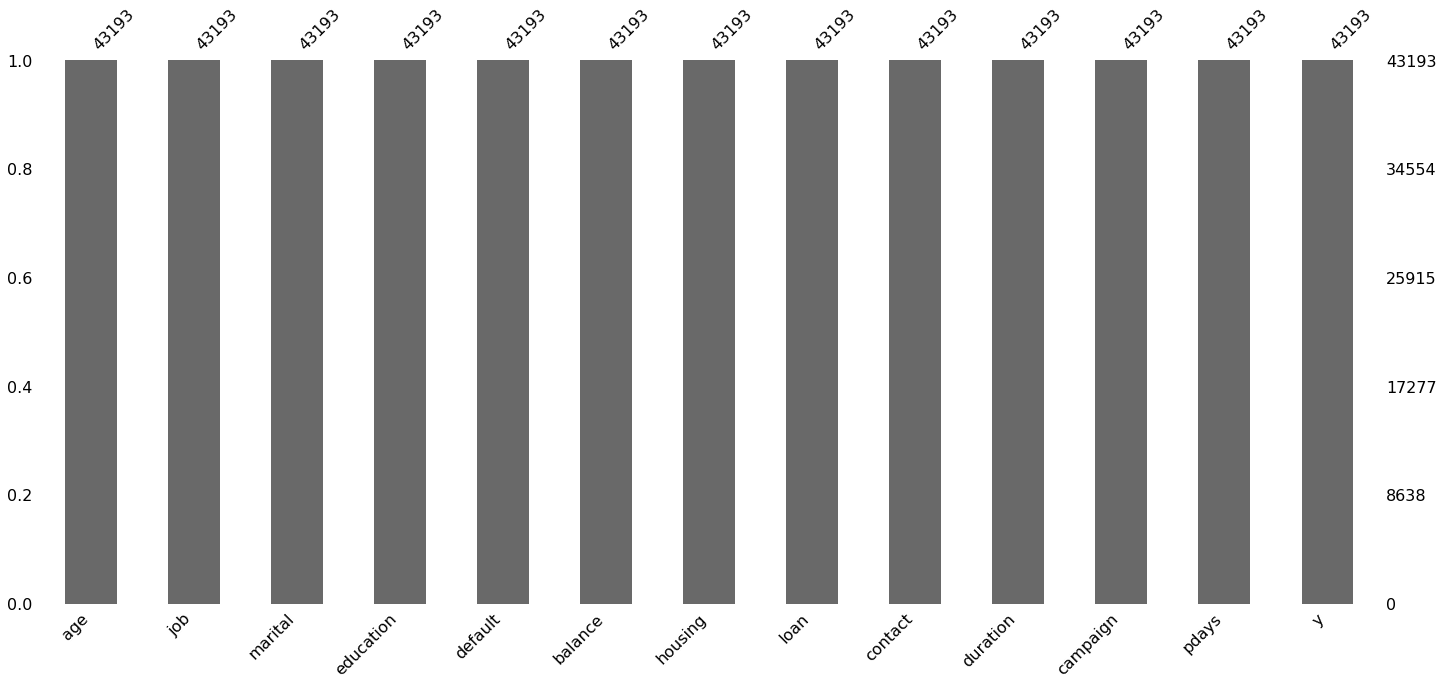

In [58]:
# All the columns currently have the same number of variables

msno.bar(data_3)

# Dealing with categorical data

In [59]:
# Looking at every field with categorical variables

for col_name in data_3.select_dtypes(include=['object']).columns:
    print(f'{col_name}\n values: {data_3[col_name].unique()}')

job
 values: ['management' 'technician' 'entrepreneur' 'retired' 'admin.' 'services'
 'blue-collar' 'self-employed' 'unemployed' 'housemaid' 'student']
marital
 values: ['married' 'single' 'divorced']
education
 values: ['tertiary' 'secondary' 'primary']
default
 values: ['no' 'yes']
housing
 values: ['yes' 'no']
loan
 values: ['no' 'yes']
contact
 values: ['unknown' 'cellular' 'telephone']
y
 values: ['no' 'yes']


In [61]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [62]:
# In the education field there is a hierarchical relationship

val_mapping = {
    'tertiary':3,
    'secondary':2,
    'primary':1}

data_3['education'] = data_3['education'].map(val_mapping)

In [63]:
# Looking at the results

data_3['education'].unique()

array([3, 2, 1], dtype=int64)

In [64]:
def label_encoder(data, field_number):
    
    """ 
    
    Function to label encode a categorical variable.
    
    Attributes:
        field_number (int): ordered number of column to be encoded
        data: dataset to be explored
            
    """
        
    labelencoder = LabelEncoder()
    data.iloc[:, field_number] = labelencoder.fit_transform(data.iloc[:, field_number])
    return data

In [65]:
data_4 = label_encoder(data_3, field_number=4)
data_4.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,y
0,58,management,married,3,0,2143,yes,no,unknown,261,1,-1,no
1,44,technician,single,2,0,29,yes,no,unknown,151,1,-1,no
2,33,entrepreneur,married,2,0,2,yes,yes,unknown,76,1,-1,no
5,35,management,married,3,0,231,yes,no,unknown,139,1,-1,no
6,28,management,single,3,0,447,yes,yes,unknown,217,1,-1,no


In [66]:
data_4['default'].unique()

array([0, 1])

In [67]:
data_5 = label_encoder(data_4, field_number=6)
data_5.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,y
0,58,management,married,3,0,2143,1,no,unknown,261,1,-1,no
1,44,technician,single,2,0,29,1,no,unknown,151,1,-1,no
2,33,entrepreneur,married,2,0,2,1,yes,unknown,76,1,-1,no
5,35,management,married,3,0,231,1,no,unknown,139,1,-1,no
6,28,management,single,3,0,447,1,yes,unknown,217,1,-1,no


In [68]:
data_6 = label_encoder(data_5, field_number=7)
data_6.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,y
0,58,management,married,3,0,2143,1,0,unknown,261,1,-1,no
1,44,technician,single,2,0,29,1,0,unknown,151,1,-1,no
2,33,entrepreneur,married,2,0,2,1,1,unknown,76,1,-1,no
5,35,management,married,3,0,231,1,0,unknown,139,1,-1,no
6,28,management,single,3,0,447,1,1,unknown,217,1,-1,no


In [69]:
data_7 = label_encoder(data_6, field_number=12)
data_7.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,y
0,58,management,married,3,0,2143,1,0,unknown,261,1,-1,0
1,44,technician,single,2,0,29,1,0,unknown,151,1,-1,0
2,33,entrepreneur,married,2,0,2,1,1,unknown,76,1,-1,0
5,35,management,married,3,0,231,1,0,unknown,139,1,-1,0
6,28,management,single,3,0,447,1,1,unknown,217,1,-1,0


In [70]:
# For the rest of the categorical variables we will create dummies

data_8 = pd.get_dummies(data_7)

In [71]:
data_8.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'duration',
       'campaign', 'pdays', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'contact_cellular', 'contact_telephone',
       'contact_unknown'],
      dtype='object')

In [72]:
data_8.head()

,age,education,default,balance,housing,loan,duration,campaign,pdays,y,...,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
0,58,3,0,2143,1,0,261,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
1,44,2,0,29,1,0,151,1,-1,0,...,0,0,1,0,0,0,1,0,0,1
2,33,2,0,2,1,1,76,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
5,35,3,0,231,1,0,139,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
6,28,3,0,447,1,1,217,1,-1,0,...,0,0,0,0,0,0,1,0,0,1


In [73]:
# Current shape

data_8.shape

(43193, 27)

In [74]:
# All the variables are now numbers

data_8.dtypes

age                  int64
education            int64
default              int32
balance              int64
housing              int32
loan                 int32
duration             int64
campaign             int64
pdays                int64
y                    int32
job_admin.           uint8
job_blue-collar      uint8
job_entrepreneur     uint8
job_housemaid        uint8
job_management       uint8
job_retired          uint8
job_self-employed    uint8
job_services         uint8
job_student          uint8
job_technician       uint8
job_unemployed       uint8
marital_divorced     uint8
marital_married      uint8
marital_single       uint8
contact_cellular     uint8
contact_telephone    uint8
contact_unknown      uint8
dtype: object

In [75]:
# Avoiding the Dummy Variable Trap 

data_9 = data_8.drop(["job_unemployed","marital_single","contact_telephone"], axis=1)

In [77]:
# Final dataset

df = data_9

In [78]:
df.head()

,age,education,default,balance,housing,loan,duration,campaign,pdays,y,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,marital_divorced,marital_married,contact_cellular,contact_unknown
0,58,3,0,2143,1,0,261,1,-1,0,...,1,0,0,0,0,0,0,1,0,1
1,44,2,0,29,1,0,151,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
2,33,2,0,2,1,1,76,1,-1,0,...,0,0,0,0,0,0,0,1,0,1
5,35,3,0,231,1,0,139,1,-1,0,...,1,0,0,0,0,0,0,1,0,1
6,28,3,0,447,1,1,217,1,-1,0,...,1,0,0,0,0,0,0,0,0,1


# Splitting in the dependent and independent variables

In [80]:
y = df.iloc[:, 9].values
X = df.drop(["y"], axis=1)

In [81]:
# Checking the shapes

X.shape

(43193, 23)

In [82]:
# Checking the shapes

y.shape

(43193,)

# Splitting in the train and test sets

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Feature Scaling

In [127]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Dimensionality reduction with PCA

In [128]:
pca_train = PCA(n_components = None)
pca_test = PCA(n_components = None)
X_train_pca = pca_train.fit_transform(X_train)
X_test_pca = pca_test.fit_transform(X_test)

In [129]:
# Explained Variance

pca_train.explained_variance_ratio_

array([0.10195587, 0.07867121, 0.0706702 , 0.06427294, 0.05444912,
       0.05217932, 0.04959805, 0.04906581, 0.04856535, 0.0462605 ,
       0.04513276, 0.04467675, 0.04416229, 0.04109823, 0.03957662,
       0.03912235, 0.03680757, 0.02913568, 0.02612584, 0.01655427,
       0.01472863, 0.00566193, 0.00152871])

In [130]:
# Cumulative Explained Variance

for pc in range(1,24):
    print(f'Principal Component {pc}')
    print(f'Explained Variance: {pca_train.explained_variance_ratio_[:pc].sum()*100}%')

Principal Component 1
Explained Variance: 10.195586613196106%
Principal Component 2
Explained Variance: 18.062707849527907%
Principal Component 3
Explained Variance: 25.129728005919628%
Principal Component 4
Explained Variance: 31.5570221912993%
Principal Component 5
Explained Variance: 37.001934673840836%
Principal Component 6
Explained Variance: 42.21986629439288%
Principal Component 7
Explained Variance: 47.179671134355765%
Principal Component 8
Explained Variance: 52.086252556869375%
Principal Component 9
Explained Variance: 56.94278713020413%
Principal Component 10
Explained Variance: 61.568836638743164%
Principal Component 11
Explained Variance: 66.0821126148131%
Principal Component 12
Explained Variance: 70.5497876777399%
Principal Component 13
Explained Variance: 74.96601652376974%
Principal Component 14
Explained Variance: 79.07583929977335%
Principal Component 15
Explained Variance: 83.03350150559758%
Principal Component 16
Explained Variance: 86.94573632592737%
Principal Com

In [131]:
# We will initially test with 15 elements - Train set

X_pca_train = pca_train.fit_transform(X_train)
X_15_train = X_pca_train[:,0:15]
X_15_train.shape

(30235, 15)

In [132]:
# We will initially test with 15 elements - Test set

X_pca_test = pca_test.fit_transform(X_test)
X_15_test = X_pca_test[:,0:15]
X_15_test.shape

(12958, 15)

# Implementation and Refinement - Model

# Scenario 1 - Features without PCA

In [133]:
# Pre-work to define the grid of parameters with Grid Search

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [5, 60, 115, 170, 225, 280, 335, 390, 445, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [137]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='accuracy', 
                              cv = 3, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [5, 60, 115, 170, 225,
                                                         280, 335, 390, 445,
                                                         500]},
                   random_state=42, return_train_score=True,
                   scoring='accuracy')

In [138]:
# looking at the best classifier

print('Best params: ', rf_random.best_params_)

Best params:  {'n_estimators': 335, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': True}


In [139]:
print('Best score: ', rf_random.best_score_)

Best score:  0.8984951180441989


In [145]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [70, 75, 80, 85, 90],
    'max_features': ['sqrt'],
    'min_samples_leaf': [2, 5, 10],
    'min_samples_split': [2, 10, 15],
    'n_estimators': [250, 275, 300, 325, 350]
}

# Create a base model
rf_grid_search = RandomForestClassifier(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_grid_search, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [70, 75, 80, 85, 90],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 10, 15],
                         'n_estimators': [250, 275, 300, 325, 350]},
             return_train_score=True)

In [146]:
# looking at the best classifier

print('Best params: ', grid_search.best_params_)

Best params:  {'bootstrap': True, 'max_depth': 70, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 250}


In [147]:
print('Best score: ', grid_search
      .best_score_)

Best score:  0.8984289673529241


# Scenario 2 - Features with PCA

In [148]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random_pca = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='accuracy', 
                              cv = 3, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random_pca.fit(X_train_pca, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [5, 60, 115, 170, 225,
                                                         280, 335, 390, 445,
                                                         500]},
                   random_state=42, return_train_score=True,
                   scoring='accuracy')

In [149]:
# looking at the best classifier

print('Best params: ', rf_random_pca.best_params_)

Best params:  {'n_estimators': 170, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


In [150]:
print('Best score: ', rf_random_pca.best_score_)

Best score:  0.8940632022173339


In [151]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [45, 47, 50, 53, 55],
    'max_features': ['sqrt'],
    'min_samples_leaf': [2, 4, 6],
    'min_samples_split': [2, 5, 10, 15],
    'n_estimators': [150, 160, 170, 180, 190]
}

# Create a base model
rf_grid_search = RandomForestClassifier(random_state = 42)

# Instantiate the grid search model
grid_search_pca = GridSearchCV(estimator = rf_grid_search, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, return_train_score=True)

grid_search_pca.fit(X_train_pca, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [45, 47, 50, 53, 55],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [150, 160, 170, 180, 190]},
             return_train_score=True)

In [153]:
# looking at the best classifier

print('Best params: ', grid_search_pca.best_params_)

Best params:  {'bootstrap': True, 'max_depth': 45, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 160}


In [155]:
print('Best score: ', grid_search_pca.best_score_)

Best score:  0.8943277787295539


# Partial conclusions

In [ ]:
# The best model has an accuracy of 0.8984951180441989
# The best model was developed in the original data, without PCA

In [157]:
# Best model

best_clf = rf_random.best_estimator_

In [161]:
# Best estimator parameters

rf_random.best_params_

{'n_estimators': 335,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

In [162]:
# Best estimator score

rf_random.best_score_

0.8984951180441989

# Refinement and Justification - Discussion

# Model Evaluation and Validation

In [166]:
precision_best = cross_val_score(best_clf, X_train, y_train, cv=5, scoring="precision")
print("Precision Mean: ", precision_best.mean())

recall_best = cross_val_score(best_clf, X_train, y_train, cv=5, scoring="recall")
print("Recall Mean: ", recall_best.mean())

roc_auc_best = cross_val_score(best_clf, X_train, y_train, cv=5, scoring="roc_auc")
print("ROC_AUC Mean: ", roc_auc_best.mean())

f_1_best = cross_val_score(best_clf,X_train, y_train, cv=5, scoring="f1")
print("f1 Mean: ", f_1_best.mean())

accuracies_best = cross_val_score(best_clf, X_train, y_train, cv=5, scoring="accuracy")
print("Accuracies Mean: ", accuracies_best.mean())

Precision Mean:  0.6267055846291638
Recall Mean:  0.3007425289878928
ROC_AUC Mean:  0.8976518148635135
f1 Mean:  0.4061113116325338
Accuracies Mean:  0.8979659335207542


# Reflection

# Can we predict wheter a client will subscribe a term deposit? Based on past data, how accurate can we be?

In [167]:
# To answer this question we will evaluate how the metrics perform in the test set 

best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)

In [171]:
print('Test accuracy: ', accuracy_score(y_test, y_pred))
print('Test precision: ', precision_score(y_test, y_pred))
print('Test precision: ', recall_score(y_test, y_pred))
print('Test f1: ', f1_score(y_test, y_pred))
print('Test roc_auc: ', roc_auc_score(y_test, y_pred))

Test accuracy:  0.8964346349745331
Test precision:  0.6120576671035387
Test precision:  0.3086582947785856
Test f1:  0.4103690685413005
Test roc_auc:  0.6413977362927441


#  What are the common features of clients that are more likely to subscribe a term deposit?

In [208]:
# Taking into account the overall data

df.head()

,age,education,default,balance,housing,loan,duration,campaign,pdays,y,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,marital_divorced,marital_married,contact_cellular,contact_unknown
0,58,3,0,2143,1,0,261,1,-1,0,...,1,0,0,0,0,0,0,1,0,1
1,44,2,0,29,1,0,151,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
2,33,2,0,2,1,1,76,1,-1,0,...,0,0,0,0,0,0,0,1,0,1
5,35,3,0,231,1,0,139,1,-1,0,...,1,0,0,0,0,0,0,1,0,1
6,28,3,0,447,1,1,217,1,-1,0,...,1,0,0,0,0,0,0,0,0,1


In [210]:
# Filtering only the clients that subscribed

df_target = df[df.y == 1]
df_target.head()

,age,education,default,balance,housing,loan,duration,campaign,pdays,y,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,marital_divorced,marital_married,contact_cellular,contact_unknown
83,59,2,0,2343,1,0,1042,1,-1,1,...,0,0,0,0,0,0,0,1,0,1
86,56,2,0,45,0,0,1467,1,-1,1,...,0,0,0,0,0,0,0,1,0,1
87,41,2,0,1270,1,0,1389,1,-1,1,...,0,0,0,0,0,1,0,1,0,1
129,55,2,0,2476,1,0,579,1,-1,1,...,0,0,0,1,0,0,0,1,0,1
168,54,3,0,184,0,0,673,2,-1,1,...,0,0,0,0,0,0,0,1,0,1


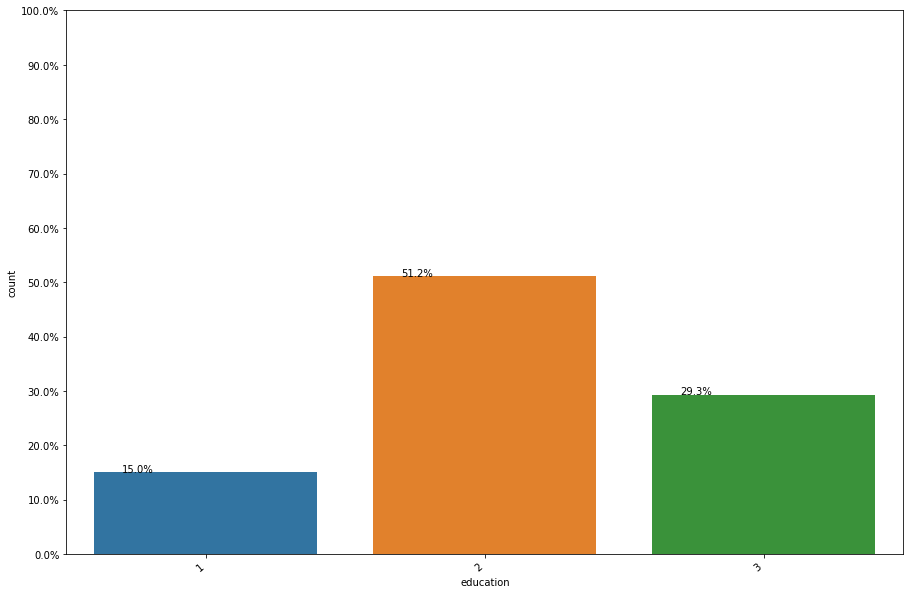

In [211]:
# Clients with secondary education are more likely to subscribe

plot_count('education', df)

C:\Users\crdea\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


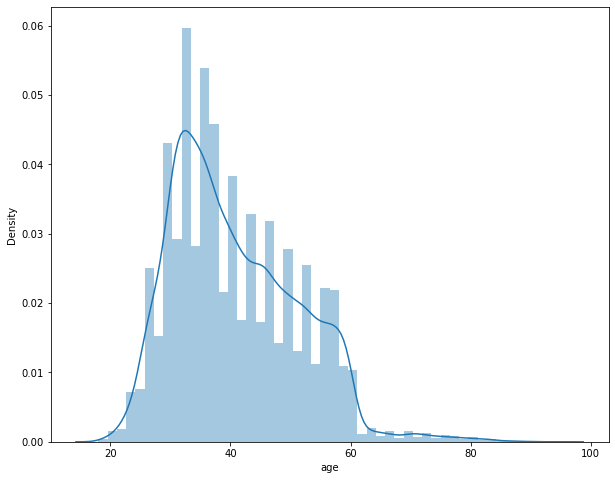

In [212]:
# Clients from 30 to 40 years are more likely to subscribe

dist_plot(data=df, y="age")

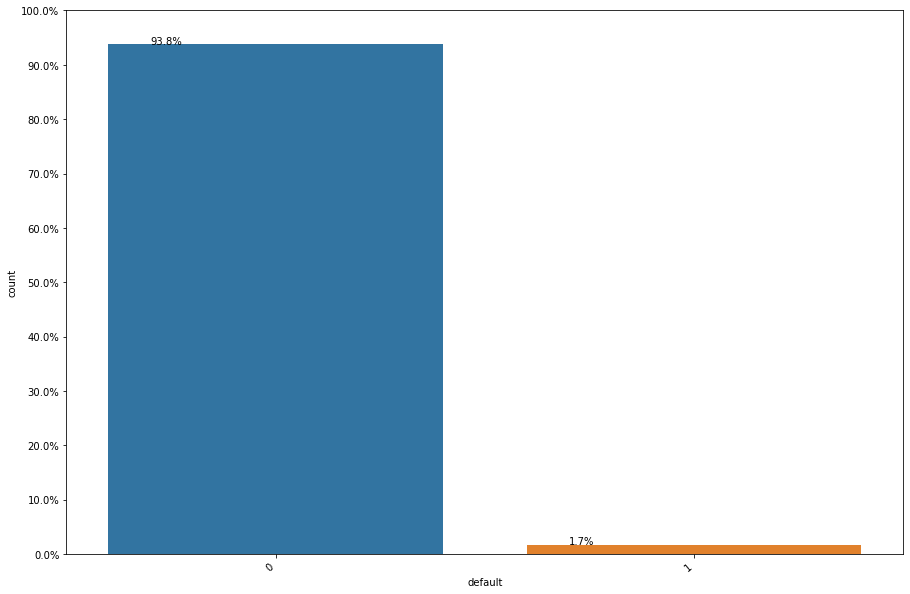

In [213]:
# Clients with no default are more likely to subscribe

plot_count('default', df)

C:\Users\crdea\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


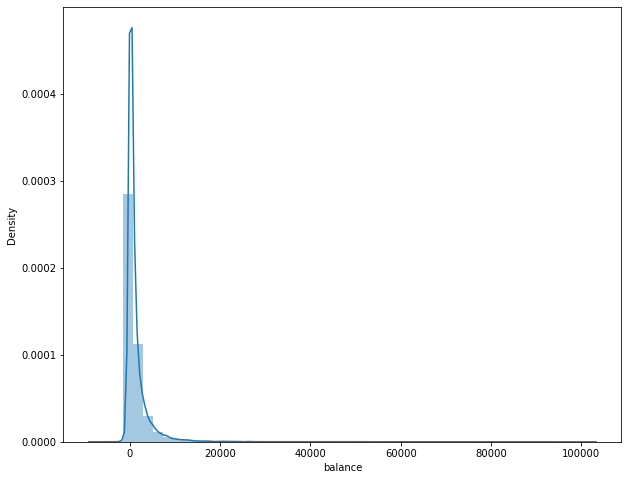

In [214]:
# Clients with balace from 0 to 10000 are more likely to subscribe

dist_plot(data=df, y="balance")

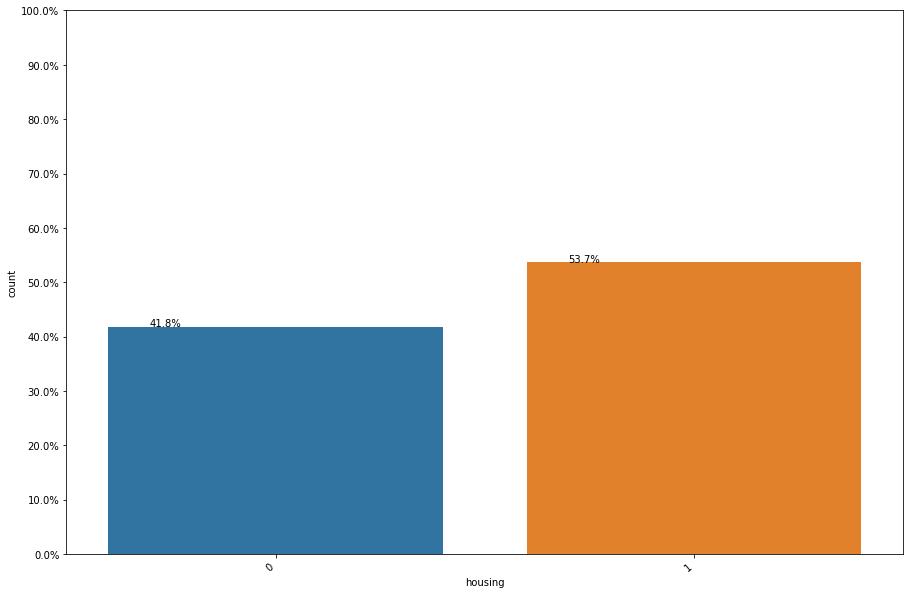

In [215]:
# Clients with housing are more likely to subscribe

plot_count('housing', df)

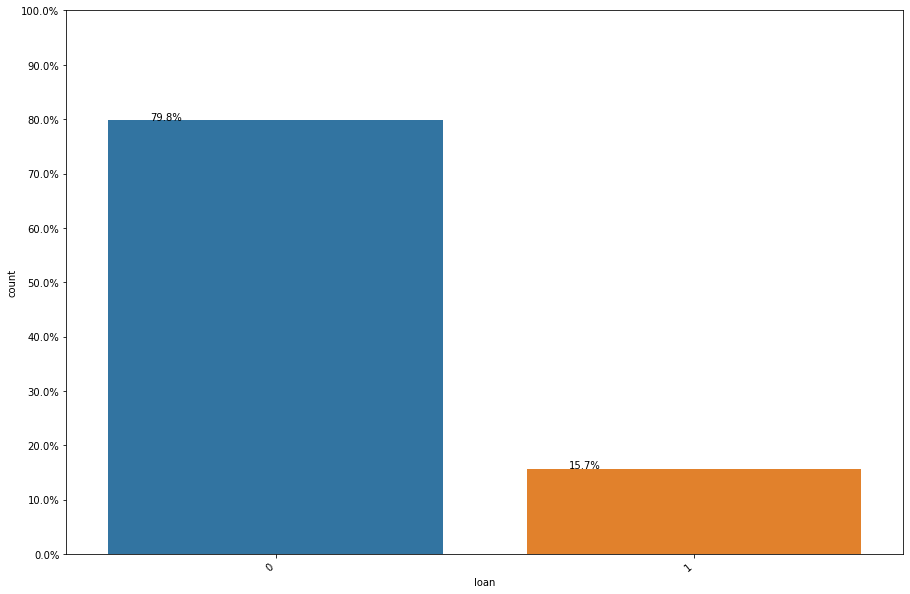

In [216]:
# Clients without loan are more likely to subscribe

plot_count('loan', df)

C:\Users\crdea\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


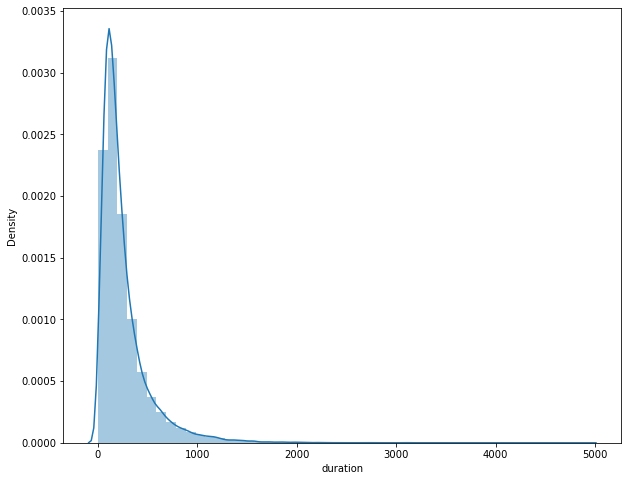

In [217]:
# Durations around 250 indicate clients more likely to subscribe

dist_plot(data=df, y="duration")

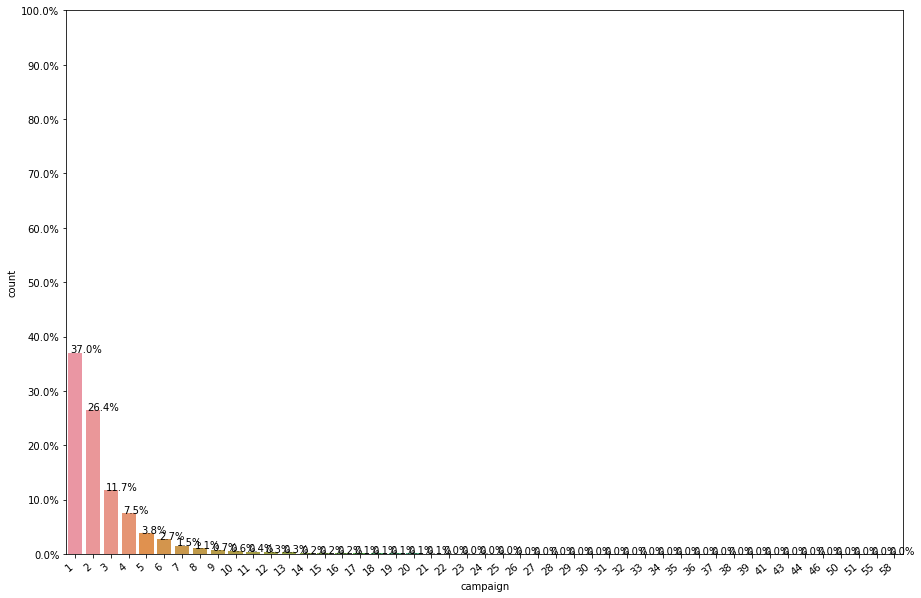

In [218]:
# Campaigns from 1 to 3 indicate clients more likely to subscribe

plot_count('campaign', df)

# In an overall perspective, can we say that the formers marketing campaings were successful?

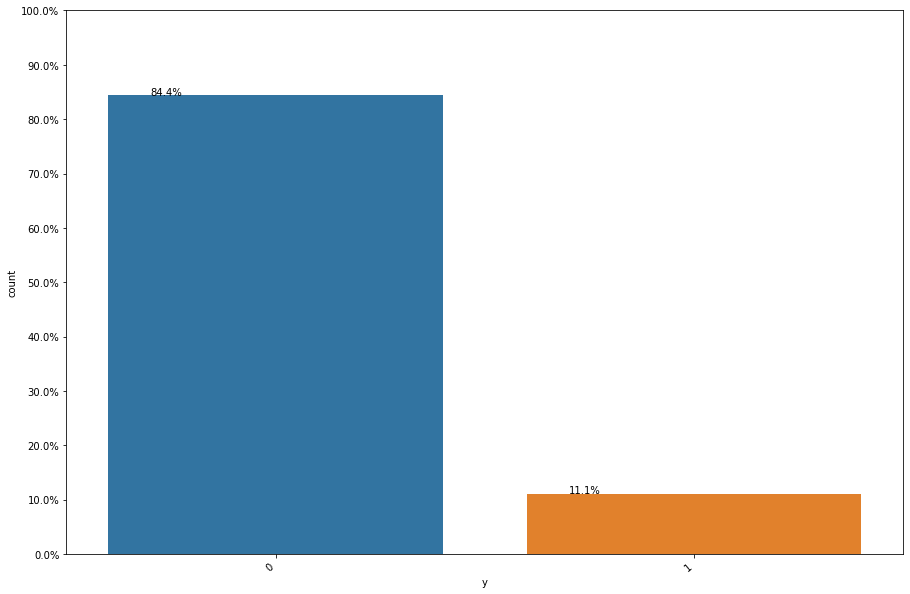

In [221]:
# Based on the distribution below we can't say the campaigns were successful
# The number of clients that didn't subscribe is way bigger than those who subscribed

plot_count('y', df)

# Improvements

Possible improvements could be:
 - Treat the problem as an unbalanced problem, using a technique such as SMOTE to increase the number of observations in target 0. This would likely improve the metrics recall, precision and f1.
 - Obtain more data to take into account the pandemics effect in clients' subscriptions.